# Amplification Factor Model Using KiK-Net Database

Dataset-: 
    
Zhu, C.; Weatherill, G.; Cotton, F.; Pilz, M.; Kwak, D. Y.; Kawase, H. (2020): 
An Open-Source Site Database of StrongMotion Stations in Japan: K-NET and KiK-net. V. v1.0.0. 
GFZ Data Services. https://doi.org/10.5880/GFZ.2.1.2020.006

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
# Load dataset

# Load the data 
af=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//amplification_prediction_KiKnet.csv",header=0)

af.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Zbh', 'VPs', 'VPb', 'VSs', 'VSb',
       'f0', 'A0', 'Geology', 'Lithological_Unit', 'Geological_Age', 'Horn',
       'ZT', 'TPI', 'TRI', 'Roughness', 'VS30', 'AF'],
      dtype='object')

In [3]:
af.head()

,Latitude,Longitude,Altitude,Zbh,VPs,VPb,VSs,VSb,f0,A0,Geology,Lithological_Unit,Geological_Age,Horn,ZT,TPI,TRI,Roughness,VS30,AF
0,44.5276,142.8444,105.0,100.0,480.0,3120.0,180.0,1870.0,NaN,NaN,Late Pleistocene to Holocene,marine and non-marine sediments,4.0,0.04209,0.04366,-31.500,36.000,99,376.9,1.0521
1,44.4234,143.0264,38.0,113.0,380.0,2530.0,120.0,1430.0,8.4775,6.9059,Middle to Late Miocene,marine and non-marine sediments,4.0,0.05396,0.05323,-43.875,45.875,148,327.3,1.1864
2,44.3843,143.2407,30.0,100.0,450.0,3000.0,100.0,1630.0,7.2966,5.6610,Cretaceous to Early Paleogene,melange matirx of accretionary complex,2.0,0.02149,0.02065,-5.000,15.500,51,321.8,1.2036
3,44.1920,143.0767,134.0,200.0,480.0,5860.0,180.0,3100.0,NaN,NaN,Middle to Late Miocene,marine and non-marine sediments,4.0,0.01919,0.00433,-34.250,34.250,86,403.3,0.9930
4,44.1146,143.0111,255.0,106.0,850.0,3360.0,230.0,1800.0,7.0105,3.2834,Late Pleistocene,middle terrace,2.0,0.01682,0.01458,-27.500,28.750,68,514.3,0.8072


In [4]:
af.f0

0           NaN
1       8.47750
2       7.29660
3           NaN
4       7.01050
         ...   
1737    1.61190
1738    7.74780
1739    0.43060
1740        NaN
1741    0.19542
Name: f0, Length: 1742, dtype: float64

In [5]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           1742 non-null   float64
 1   Longitude          1742 non-null   float64
 2   Altitude           1717 non-null   float64
 3   Zbh                1708 non-null   float64
 4   VPs                1667 non-null   float64
 5   VPb                1667 non-null   float64
 6   VSs                1667 non-null   float64
 7   VSb                1667 non-null   float64
 8   f0                 1455 non-null   float64
 9   A0                 1455 non-null   float64
 10  Geology            1736 non-null   object 
 11  Lithological_Unit  1736 non-null   object 
 12  Geological_Age     1733 non-null   float64
 13  Horn               1742 non-null   float64
 14  ZT                 1742 non-null   float64
 15  TPI                1742 non-null   float64
 16  TRI                1742 

In [6]:
np.shape(af)

(1742, 20)

In [7]:
# Variation of AF with VS30
plt.scatter(af.VS30,y)

NameError: name 'y' is not defined

[0, 0, 25, 34, 75, 75, 75, 75, 287, 287, 6, 6, 9, 0, 0, 0, 0, 0, 7, 0]


Text(0, 0.5, 'Missing value Count')

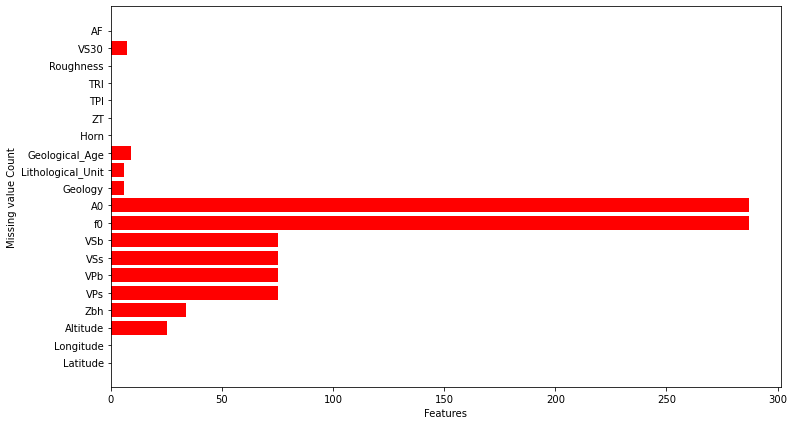

In [15]:
#check for missing values

miss_val=[]
for i in range(len(af.columns)):
      miss=af[af.columns[i]].isna().sum()
      miss_val.append(miss)

print(miss_val)

# bar_plot
plt.figure(figsize=(12,7))
plt.barh(af.columns,miss_val,color='r')
plt.xlabel('Features');plt.ylabel('Missing value Count')

<AxesSubplot:>

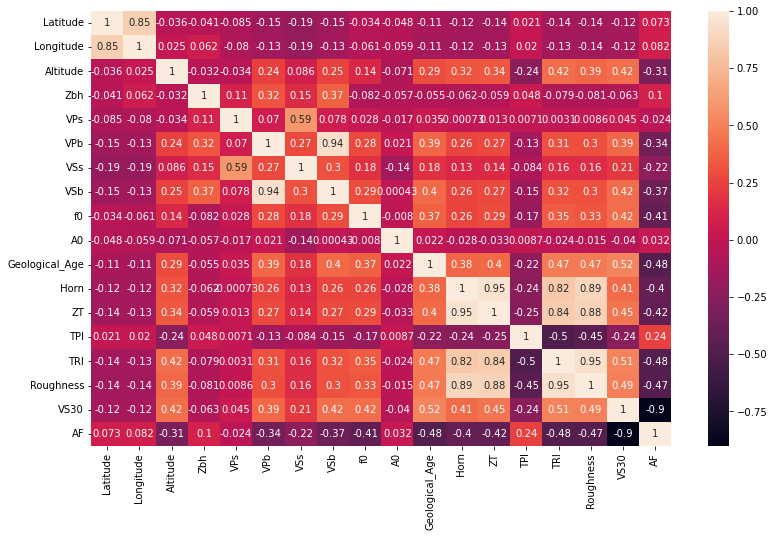

In [70]:
# Understand Correlation 
plt.figure(figsize=(13,8))
sn.heatmap(af.corr(),annot=True)

<BarContainer object of 10 artists>

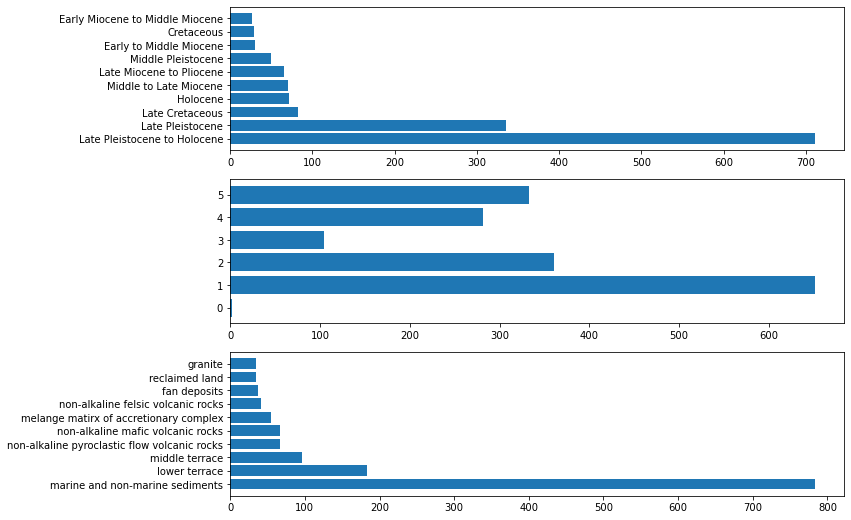

In [101]:
# replace or fillna Vps,Vpb,Vss,Vsb by mean values

# Geology features
geo=af.Geology.value_counts()
geo

# plot 

fig,ax=plt.subplots(3,1,figsize=(11,9))
ax[0].barh(af.Geology.value_counts().index[0:10],af.Geology.value_counts().head(10))
ax[1].barh(af.Geological_Age.value_counts().index[0:10],af.Geological_Age.value_counts().head(10))
ax[2].barh(af.Lithological_Unit.value_counts().index[0:10],af.Lithological_Unit.value_counts().head(10))


In [8]:
# fillna
af.fillna({'Geology':'Late Pleistocene to Holocene'},inplace=True)
af.fillna({'Geological_Age':1},inplace=True)
af.fillna({'Lithological_Unit':'marine and non-marine sediments'},inplace=True)


In [9]:
# drop hvsr param for now
af.drop(['A0','f0'],axis='columns',inplace=True)

In [10]:
# by mean 
af.VS30.fillna(af.VS30.mean(),inplace=True)
af.Altitude.fillna(af.Altitude.mean(),inplace=True)

af.isna().sum()

Latitude              0
Longitude             0
Altitude              0
Zbh                  34
VPs                  75
VPb                  75
VSs                  75
VSb                  75
Geology               0
Lithological_Unit     0
Geological_Age        0
Horn                  0
ZT                    0
TPI                   0
TRI                   0
Roughness             0
VS30                  0
AF                    0
dtype: int64

In [11]:
# drop na
af.dropna(inplace=True)

af.isna().sum()

Latitude             0
Longitude            0
Altitude             0
Zbh                  0
VPs                  0
VPb                  0
VSs                  0
VSb                  0
Geology              0
Lithological_Unit    0
Geological_Age       0
Horn                 0
ZT                   0
TPI                  0
TRI                  0
Roughness            0
VS30                 0
AF                   0
dtype: int64

In [12]:
# target variable
y=af.AF

# drop target from af
af.drop('AF',inplace=True,axis='columns')



In [13]:
# 
af.drop(['Latitude','Longitude'],inplace=True,axis='columns')


In [65]:
# Dummy variables
dummies=pd.get_dummies(data=af,columns=['Geology','Lithological_Unit'])
dummies

# escape dummy trap
X=dummies.drop(['Lithological_Unit_reclaimed land','Geology_Holocene'],axis='columns')

np.shape(dummies)

(1667, 123)

In [59]:
# feature classes

#X=af[['Altitude','Zbh','VPs','VPb','VSs','VSb','Geology','Lithological_Unit','Geological_Age','Horn','ZT','TPI']]
X_to_sc=dummies[['Altitude','Zbh','VPs','VPb','VSs','VSb','Horn','ZT','TPI','TRI', 'Roughness','VS30','Geological_Age']]
X_to_sc


,Altitude,Zbh,VPs,VPb,VSs,VSb,Horn,ZT,TPI,TRI,Roughness,VS30,Geological_Age
0,105.0,100.0,480.0,3120.0,180.0,1870.0,0.04209,0.04366,-31.500,36.000,99,376.9,4.0
1,38.0,113.0,380.0,2530.0,120.0,1430.0,0.05396,0.05323,-43.875,45.875,148,327.3,4.0
2,30.0,100.0,450.0,3000.0,100.0,1630.0,0.02149,0.02065,-5.000,15.500,51,321.8,2.0
3,134.0,200.0,480.0,5860.0,180.0,3100.0,0.01919,0.00433,-34.250,34.250,86,403.3,4.0
4,255.0,106.0,850.0,3360.0,230.0,1800.0,0.01682,0.01458,-27.500,28.750,68,514.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,198.0,10.0,340.0,2000.0,110.0,420.0,0.03802,0.04641,-20.125,22.875,80,361.9,1.0
1737,50.0,10.0,400.0,1700.0,140.0,650.0,0.05162,0.05629,-31.250,39.500,120,497.9,1.0
1738,370.0,10.0,400.0,1800.0,120.0,700.0,0.03481,0.05493,67.625,67.625,96,538.0,4.0
1739,252.0,11.0,300.0,1200.0,100.0,160.0,0.00654,0.00657,-0.500,4.250,13,368.0,1.0


In [123]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()

X_sc=sc.fit_transform(X_to_sc)
X_sc

X_scaled=pd.DataFrame(X_sc)
X_scaled


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.071735,0.047548,0.098851,0.472566,0.076923,0.554795,0.131830,0.127441,0.453798,0.173860,0.160656,0.372185,0.8
1,0.026817,0.054054,0.075862,0.368142,0.048077,0.417808,0.169274,0.155375,0.421243,0.221884,0.240984,0.294062,0.8
2,0.021453,0.047548,0.091954,0.451327,0.038462,0.480075,0.066845,0.060276,0.523512,0.074164,0.081967,0.285399,0.4
3,0.091177,0.097598,0.098851,0.957522,0.076923,0.937733,0.059590,0.012639,0.446564,0.165350,0.139344,0.413766,0.8
4,0.172298,0.050551,0.183908,0.515044,0.100962,0.533001,0.052114,0.042558,0.464321,0.138602,0.109836,0.588597,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.134084,0.002503,0.066667,0.274336,0.043269,0.103362,0.118991,0.135468,0.483722,0.110030,0.129508,0.348559,0.2
1663,0.034862,0.002503,0.080460,0.221239,0.057692,0.174969,0.161893,0.164307,0.454456,0.190881,0.195082,0.562766,0.2
1664,0.249397,0.002503,0.080460,0.238938,0.048077,0.190535,0.108864,0.160337,0.714568,0.327660,0.155738,0.625925,0.8
1665,0.170287,0.003003,0.057471,0.132743,0.038462,0.022416,0.019685,0.019177,0.535350,0.019453,0.019672,0.358167,0.2


In [100]:
# combine scaled data(X_sc) with categorical (on-hot encoded) data
X_temp=dummies.drop(['Altitude','Zbh','VPs','VPb','VSs','VSb','Horn','ZT','TPI','Lithological_Unit_reclaimed land','Geology_Holocene','Geological_Age','TRI','Roughness','VS30'],axis='columns')

X_temp.reset_index(inplace=True)

X_temp

,index,Geology_Carboniferous,Geology_Carboniferous to Middle Jurassic,Geology_Carboniferous to Permian,Geology_Cretaceous,Geology_Cretaceous to Early Paleogene,Geology_Early Cretaceous,Geology_Early Miocene to Middle Miocene,Geology_Early Pleistocene,Geology_Early to Late Cretaceous,...,Lithological_Unit_psammitic gneiss (Ryoke),Lithological_Unit_sand dune deposits,Lithological_Unit_sandstone of accretionary complex,Lithological_Unit_sandy turbidite of accretionary complex,Lithological_Unit_siliceous gneiss (Ryoke),Lithological_Unit_swamp deposits,Lithological_Unit_tephra,Lithological_Unit_turbidite of accretionary complex,Lithological_Unit_ultramafic rocks,Lithological_Unit_volcanic debris
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1663,1737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1664,1738,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1665,1739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X=pd.concat([X_scaled, X_temp],axis='columns')

#X=X.dropna()
X

,0,1,2,3,4,5,6,7,8,9,...,Lithological_Unit_psammitic gneiss (Ryoke),Lithological_Unit_sand dune deposits,Lithological_Unit_sandstone of accretionary complex,Lithological_Unit_sandy turbidite of accretionary complex,Lithological_Unit_siliceous gneiss (Ryoke),Lithological_Unit_swamp deposits,Lithological_Unit_tephra,Lithological_Unit_turbidite of accretionary complex,Lithological_Unit_ultramafic rocks,Lithological_Unit_volcanic debris
0,0.071735,0.047548,0.098851,0.472566,0.076923,0.554795,0.131830,0.127441,0.453798,0.173860,...,0,0,0,0,0,0,0,0,0,0
1,0.026817,0.054054,0.075862,0.368142,0.048077,0.417808,0.169274,0.155375,0.421243,0.221884,...,0,0,0,0,0,0,0,0,0,0
2,0.021453,0.047548,0.091954,0.451327,0.038462,0.480075,0.066845,0.060276,0.523512,0.074164,...,0,0,0,0,0,0,0,0,0,0
3,0.091177,0.097598,0.098851,0.957522,0.076923,0.937733,0.059590,0.012639,0.446564,0.165350,...,0,0,0,0,0,0,0,0,0,0
4,0.172298,0.050551,0.183908,0.515044,0.100962,0.533001,0.052114,0.042558,0.464321,0.138602,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.134084,0.002503,0.066667,0.274336,0.043269,0.103362,0.118991,0.135468,0.483722,0.110030,...,0,0,0,0,0,0,0,0,0,0
1663,0.034862,0.002503,0.080460,0.221239,0.057692,0.174969,0.161893,0.164307,0.454456,0.190881,...,0,0,0,0,0,0,0,0,0,0
1664,0.249397,0.002503,0.080460,0.238938,0.048077,0.190535,0.108864,0.160337,0.714568,0.327660,...,0,0,0,0,0,0,0,0,0,0
1665,0.170287,0.003003,0.057471,0.132743,0.038462,0.022416,0.019685,0.019177,0.535350,0.019453,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Test Train Split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
941,0.003352,0.007508,0.150345,0.093805,0.037500,0.063200,0.015079,0.020841,0.528773,0.018237,0.022951,0.188376,0.2
1307,0.249397,0.002503,0.085057,0.192920,0.072115,0.115816,0.224416,0.255261,0.479776,0.195137,0.272131,0.788628,0.6
1520,0.030973,0.003504,0.091954,0.256637,0.052885,0.070672,0.129464,0.129280,0.517922,0.182979,0.201639,0.268074,0.8
859,0.029364,0.007508,0.067816,0.380531,0.064904,0.097136,0.006625,0.007151,0.534364,0.007903,0.006557,0.410616,0.4
632,0.068383,0.052553,0.057471,0.876106,0.062500,0.782067,0.107350,0.180566,0.526472,0.120973,0.129508,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,0.249397,0.002503,0.080460,0.238938,0.048077,0.190535,0.108864,0.160337,0.714568,0.327660,0.155738,0.625925,0.8
669,0.003888,0.007508,0.158621,0.196460,0.076923,0.112702,0.036593,0.043405,0.536337,0.035866,0.039344,0.380532,0.2
62,0.162242,0.047548,0.034483,0.396460,0.028846,0.433375,0.356562,0.397647,0.617889,0.350760,0.375410,0.318160,0.6
1434,0.021453,0.002503,0.108046,0.274336,0.076923,0.159402,0.107003,0.095157,0.549161,0.099696,0.147541,0.332021,0.4


# ML based Regression Algorithms

# Random Forest Regression

In [125]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
reg_rf = RandomForestRegressor(n_estimators = 100)
 
# fit the regressor with x and y data
reg_rf.fit(X_train,y_train) 

RandomForestRegressor()

In [126]:
# predict
acc_rf=reg_rf.score(X_test,y_test)
print(f"The score of the Random Forest Regressor model is: {round(acc_rf*100,2)}%")

# 
y_pred_rf=reg_rf.predict(X_test)

The score of the Random Forest Regressor model is: 99.88%


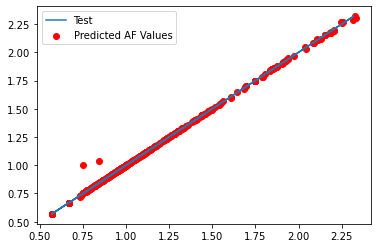

In [127]:
# plot for validation

plt.plot(y_test,y_test)
plt.scatter(y_pred_rf,y_test,color='r')
plt.legend(['Test','Predicted AF Values'])

# Decision Tree Regressor 

In [128]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
reg_dt = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
reg_dt.fit(X_train, y_train)

# score
# predict
acc_dt=reg_dt.score(X_test,y_test)
print(f"The score of the DecisionTree Regressor model is: {round(acc_dt*100,2)}%")

# 
y_pred_dt=reg_dt.predict(X_test)

The score of the DecisionTree Regressor model is: 99.97%


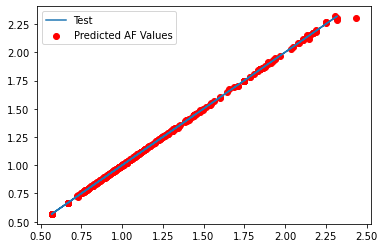

In [129]:
# plot for validation

plt.plot(y_test,y_test)
plt.scatter(y_pred_dt,y_test,color='r')
plt.legend(['Test','Predicted AF Values'])

# Support Vector Regressor

In [130]:
from sklearn.svm import SVR

reg_svm = SVR()

reg_svm.fit(X_train, y_train)

# score
acc_svm=reg_svm.score(X_test,y_test)
print(f"The score of the SVM Regressor model is: {round(acc_svm*100,2)}%")

# prediction
y_pred_svm=reg_svm.predict(X_test)

The score of the SVM Regressor model is: 96.62%


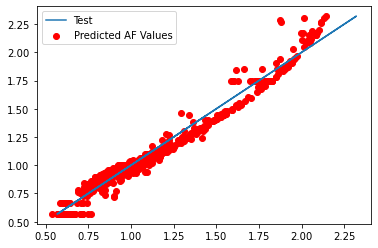

In [131]:
# plot for validation

plt.plot(y_test,y_test)
plt.scatter(y_pred_svm,y_test,color='r')
plt.legend(['Test','Predicted AF Values'])

# K Nearest Neighbors (KNN) Regression

In [111]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [121]:
# Loop to search for optimal K value (to give max score and min RMSE)

rmse_val = [] #to store rmse values for different k
score=[]  #to store acc_knn values for different k

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred_knn=model.predict(X_test) #make prediction on test set
    acc_knn=model.score(X_test,y_test)
    error = sqrt(mean_squared_error(y_test,y_pred_knn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    score.append(acc_knn)
    print(f"The RMSE error is:{error} for k={K}")
    print(f"The Score is:{round(acc_knn*100,2)}% for k={K}")

The RMSE error is:0.1640407976492835 for k=1
The Score is:84.3% for k=1
The RMSE error is:0.13021893065218898 for k=2
The Score is:90.11% for k=2
The RMSE error is:0.11914733282576806 for k=3
The Score is:91.72% for k=3
The RMSE error is:0.11830537555402985 for k=4
The Score is:91.84% for k=4
The RMSE error is:0.11667854313430603 for k=5
The Score is:92.06% for k=5
The RMSE error is:0.11390190625101884 for k=6
The Score is:92.43% for k=6
The RMSE error is:0.11708360833779782 for k=7
The Score is:92.0% for k=7
The RMSE error is:0.1182423360370536 for k=8
The Score is:91.84% for k=8
The RMSE error is:0.12090583588899649 for k=9
The Score is:91.47% for k=9
The RMSE error is:0.12007081161795656 for k=10
The Score is:91.59% for k=10
The RMSE error is:0.12074634202678225 for k=11
The Score is:91.5% for k=11
The RMSE error is:0.1221163451100699 for k=12
The Score is:91.3% for k=12
The RMSE error is:0.12457655763963998 for k=13
The Score is:90.95% for k=13
The RMSE error is:0.1262753866098736 

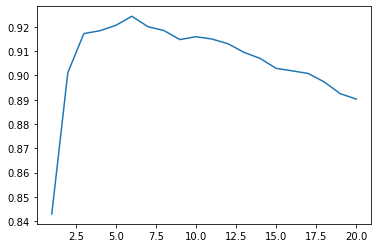

In [122]:
# RMSE with K value
plt.plot(np.arange(1,21),score)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout